# Learning a cosine with keras

In [1]:
import os
os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,optimizer=None,device=cpu,floatX=float32'

In [67]:
import numpy as np
import sklearn.cross_validation as skcv
#x = np.linspace(0, 5*np.pi, num=10000, dtype=np.float32)
x = np.linspace(0, 4*np.pi, num=10000, dtype=np.float32)
y = np.cos(x)
x /= 16.0

train, test = skcv.train_test_split(np.arange(x.shape[0]))
print train.shape
print test.shape

(7500,)
(2500,)


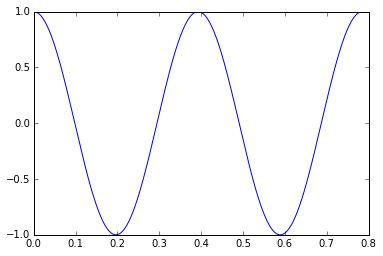

In [68]:
import pylab as pl
%matplotlib inline
pl.plot(x, y)

In [69]:
X_train = x[train].reshape(-1, 1)
y_train = y[train]

print "x_train : ", X_train.min(), X_train.max()
print X_train.shape
print "y_train : ", y_train.min(), y_train.max()
print y_train.shape
assert X_train.dtype == np.float32
assert y_train.dtype == np.float32

x_train :  0.0 0.785398
(7500, 1)
y_train :  -1.0 1.0
(7500,)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print scaler.transform(X_train)

[[-0.62316418]
 [ 1.24979377]
 [ 0.13072649]
 ..., 
 [ 0.39656121]
 [ 1.50385964]
 [ 1.48759115]]


In [137]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.layer_utils import print_layer_shapes

model = Sequential()
model.add(Dense(1, 4, init='lecun_uniform'))
model.add(Activation('tanh'))
model.add(Dense(4, 1, init='lecun_uniform'))
model.add(Activation('tanh'))

print "X_train shape :", X_train.shape
print_layer_shapes(model, input_shapes=(42, ) + X_train.shape[1:])

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

print model.get_weights()
history = model.fit(scaler.transform(X_train), y_train, nb_epoch=5, batch_size=64, shuffle=True)

X_train shape : (7500, 1)
input shapes :  [(42, 1)]
shape after Dense: (42, 4)
shape after Activation: (42, 4)
shape after Dense: (42, 1)
shape after Activation: (42, 1)
[array([[ 0.36306131,  1.50561059, -1.08184421,  1.10758543]], dtype=float32), array([ 0.,  0.,  0.,  0.], dtype=float32), array([[ 0.18666041],
       [-0.63225538],
       [-0.69284427],
       [-0.21309103]], dtype=float32), array([ 0.], dtype=float32)]
Epoch 1/5
7500/7500 [==============================] - 1s - loss: 0.3184     
Epoch 2/5
7500/7500 [==============================] - 1s - loss: 0.0120     
Epoch 3/5
7500/7500 [==============================] - 1s - loss: 0.0069     
Epoch 4/5
7500/7500 [==============================] - 1s - loss: 0.0065     
Epoch 5/5
7500/7500 [==============================] - 1s - loss: 0.0064     


In [138]:
y_pred = model.predict(scaler.transform(x.reshape(-1, 1)))

In [139]:
model.get_weights()

[array([[ 1.90693951,  3.03608298, -2.82860422,  1.85954726]], dtype=float32),
 array([-2.4561851 , -1.49191809, -1.458408  ,  2.3169136 ], dtype=float32),
 array([[ 2.44517422],
        [-2.03872871],
        [-2.22366691],
        [-2.61412239]], dtype=float32),
 array([ 2.33407426], dtype=float32)]

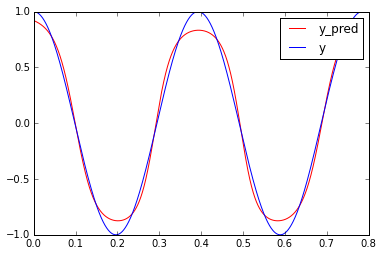

In [140]:
pl.plot(x, y_pred, c='r', label='y_pred')
pl.plot(x, y, c='b', label='y')
pl.legend()

## With random forest

In [141]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, max_depth=10).fit(scaler.transform(X_train), y_train)

y_pred_rf = rf.predict(scaler.transform(x.reshape(-1, 1)))

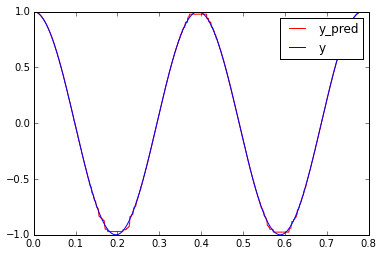

In [142]:
pl.plot(x, y_pred_rf, c='r', label='y_pred')
pl.plot(x, y, c='b', label='y')
pl.legend()